In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
%matplotlib inline


In [2]:
data_folder = r'C:\Users\ocni\PycharmProjects\delphin_6_automation\data_process\simtime_prediction\data'
excel_file = os.path.join(data_folder, 'sim_time.xlsx')

data = pd.read_excel(excel_file)
data.shape

(720, 22)

Text(0.5,0,'Simulation Time in minutes')

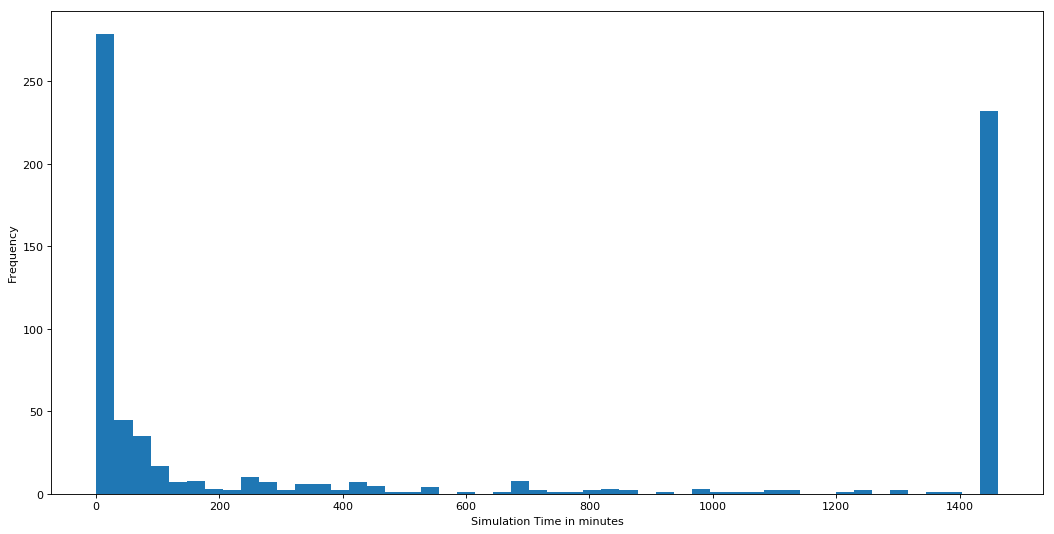

In [3]:
plt.figure(figsize=(16, 8), dpi= 80, facecolor='w', edgecolor='k')
(data['time'][data['time'] < 1500 * 60] / 60).plot('hist', bins=50)
plt.xlabel('Simulation Time in minutes')
#plt.savefig('simulation_time_histogram.png')

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor

C:\Users\ocni\AppData\Local\Continuum\anaconda3\envs\ribuild\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working



In [5]:
y_data = data['time']

x_data = data.loc[:, data.columns != 'time']
x_data.loc[:, 'exterior climate'] = np.ones(len(x_data['exterior climate']))
x_data = x_data.fillna(0.0)
x_data.loc[x_data.loc[:, 'interior climate'] == 'a', 'interior climate'] = 0.0
x_data.loc[x_data.loc[:, 'interior climate'] == 'b', 'interior climate'] = 1.0
x_data.loc[x_data.loc[:, 'system_name'] == 'ClimateBoard', 'system_name'] = 1.0
x_data.head()

C:\Users\ocni\AppData\Local\Continuum\anaconda3\envs\ribuild\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,exterior heat transfer coefficient slope,exterior moisture transfer coefficient,solar absorption,rain scale factor,interior heat transfer coefficient,interior moisture transfer coefficient,interior sd value,wall orientation,wall core width,wall core material,...,plaster material,start year,exterior climate,interior climate,exterior_plaster,system_name,insulation_material,finish_material,detail_material,insulation_thickness
0,3.947266,5.652344e-09,0.40625,0.339844,8.671875,4.843750e-09,0.023438,11.25,0.8,563,...,148,2020,1.0,0,True,0,0.0,0.0,0.0,0.0
1,3.947266,5.652344e-09,0.40625,0.339844,8.671875,4.843750e-09,0.023438,11.25,0.8,563,...,148,2020,1.0,0,False,0,0.0,0.0,0.0,0.0
2,3.947266,5.652344e-09,0.40625,0.339844,8.671875,4.843750e-09,0.023438,11.25,0.8,563,...,148,2020,1.0,0,True,1,707.0,722.0,705.0,25.0
3,3.947266,5.652344e-09,0.40625,0.339844,8.671875,4.843750e-09,0.023438,11.25,0.8,563,...,148,2020,1.0,0,True,1,707.0,722.0,705.0,30.0
4,3.947266,5.652344e-09,0.40625,0.339844,8.671875,4.843750e-09,0.023438,11.25,0.8,563,...,148,2020,1.0,0,True,1,707.0,722.0,705.0,50.0


In [43]:
x_data.columns

Index(['exterior heat transfer coefficient slope',
       'exterior moisture transfer coefficient', 'solar absorption',
       'rain scale factor', 'interior heat transfer coefficient',
       'interior moisture transfer coefficient', 'interior sd value',
       'wall orientation', 'wall core width', 'wall core material',
       'plaster width', 'plaster material', 'start year', 'exterior climate',
       'interior climate', 'exterior_plaster', 'system_name',
       'insulation_material', 'finish_material', 'detail_material',
       'insulation_thickness'],
      dtype='object')

In [6]:
processed_data = x_data.assign(time=y_data/60)

data = [
    go.Parcoords(
        line = dict(color = processed_data['time'],
                   colorscale = 'Jet',
                   showscale = True,
                   #reversescale = True,
                   cmin = 0,
                   cmax = 1500),
                   
        dimensions = list([
            dict(range = [0,1440],
                label = 'Time', values = processed_data['time']),
            dict(range = [0, 5],
                label = 'exterior heat transfer coefficient slope', values = processed_data['exterior heat transfer coefficient slope']),
            dict(range = [4 * 10 ** -9, 10 ** -8],
                label = 'exterior moisture transfer coefficient', values = processed_data['exterior moisture transfer coefficient']),
            dict(range = [0.4, 0.8],
                label = 'solar absorption', values = processed_data['solar absorption']),
            dict(range = [0.0, 2.0],
                label = 'rain scale factor', values = processed_data['rain scale factor']),
            dict(range = [0.0, 1.0],
                label = 'interior climate', values = processed_data['interior climate']),
            dict(range = [4.0, 11.0],
                label = 'interior heat transfer coefficient', values = processed_data['interior heat transfer coefficient']),
            dict(range = [4 * 10 ** -9, 10 ** -8],
                label = 'interior moisture transfer coefficient', values = processed_data['interior moisture transfer coefficient']),
            dict(range = [0.0, 0.6],
                label = 'interior sd value', values = processed_data['interior sd value']),
            dict(range = [0.0, 360.0],
                label = 'wall orientation', values = processed_data['wall orientation']),
            dict(range = [0.0, 1.0],
                label = 'wall core width', values = processed_data['wall core width']),
            dict(range = [0.0, 1000],
                label = 'wall core material', values = processed_data['wall core material']),
            dict(range = [0.01, 0.02],
                label = 'plaster width', values = processed_data['plaster width']),
            dict(range = [0.0, 1000],
                label = 'plaster material', values = processed_data['plaster material']),
            
            dict(range = [0.0, 1.0],
                label = 'exterior_plaster', values = processed_data['exterior_plaster']),
            
            dict(range = [0.0, 1.0],
                label = 'system_name', values = processed_data['system_name']),
            
            dict(range = [0.0, 1000],
                label = 'insulation_material', values = processed_data['insulation_material']),
            
            dict(range = [0.0, 1000],
                label = 'finish_material', values = processed_data['finish_material']),
            
            dict(range = [0.0, 1000],
                label = 'detail_material', values = processed_data['detail_material']),
            
            dict(range = [0.0, 200],
                label = 'insulation_thickness', values = processed_data['insulation_thickness']),
        ])
    )
]

layout = go.Layout(
    plot_bgcolor = '#E5E5E5',
    paper_bgcolor = '#E5E5E5'
)

fig = go.Figure(data = data, layout = layout)
plot(fig, filename = 'sim_time.html')

'file://C:\\Users\\ocni\\PycharmProjects\\delphin_6_automation\\data_process\\simtime_prediction\\sim_time.html'

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, random_state=0)

In [34]:
# Linear Model
linreg = linear_model.LinearRegression(normalize=True)
linreg.fit(X_train, y_train)

print('linear model intercept: {}'.format(linreg.intercept_))
print('linear model coeff:\n{}'.format(linreg.coef_))
print('R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(linreg.score(X_test, y_test)))
print('Number of non-zero features: {}'.format(np.sum(linreg.coef_ != 0)))

linear model intercept: -146431.29552704975
linear model coeff:
[-4.09653786e+02 -2.48836794e+12 -3.92131130e+04  3.63188011e+04
  1.82838075e+03  8.26817586e+11  8.86351351e+03  2.94954564e+01
 -1.57734295e+04  1.71150520e+01 -1.32381981e+06  1.42113206e+00
  9.40148182e+01  4.84287739e-08  2.85372498e+03 -4.65635883e+04
 -4.53371303e+05  1.92677646e+03 -6.27938092e+02 -6.43079862e+02
  8.15260132e+01]
R-squared score (training): 0.545
R-squared score (test): 0.549
Number of non-zero features: 21


In [35]:
# Ridge Model

linridge = linear_model.Ridge(alpha=20.0).fit(X_train, y_train)

print('ridge regression linear model intercept: {}'.format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'.format(linridge.coef_))
print('R-squared score (training): {:.3f}'.format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'.format(np.sum(linridge.coef_ != 0)))


ridge regression linear model intercept: 78381.54698385712
ridge regression linear model coeff:
[ 3.55197589e+03 -1.68362695e-04 -9.22775583e+03  3.07627741e+04
  7.34655980e+02 -6.90125302e-06  1.22217217e+03  1.55624350e+01
 -2.67256126e+03  2.13822170e+01 -1.35188189e+02  2.37796653e+00
 -4.32085689e+01  0.00000000e+00  4.33097842e+03 -4.05853062e+04
 -9.23015498e-01  1.33161123e+03 -6.66417197e+02 -6.50725931e+02
  8.33959649e+01]
R-squared score (training): 0.518
R-squared score (test): 0.550
Number of non-zero features: 20


In [36]:
# Ridge Model Normalized
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge_normal = linear_model.Ridge(alpha=20.0).fit(X_train_scaled, y_train)

print('ridge regression linear model intercept: {}'.format(linridge_normal.intercept_))
print('ridge regression linear model coeff:\n{}'.format(linridge_normal.coef_))
print('R-squared score (training): {:.3f}'.format(linridge_normal.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'.format(linridge_normal.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'.format(np.sum(linridge_normal.coef_ != 0)))

ridge regression linear model intercept: 21661.145894062258
ridge regression linear model coeff:
[  5289.96379689  -8990.85243356 -10456.25598679  44117.63336173
   3130.60446854   3364.63711955   4699.43280863   8184.84571239
  -5698.66258618   3106.23984627  -2836.91333498   1872.1691941
    193.80241927      0.           6322.96189902 -39865.76892907
    403.61838467    420.78672864    403.61838467    403.61838467
   4724.67851213]
R-squared score (training): 0.515
R-squared score (test): 0.574
Number of non-zero features: 20


In [37]:
# K-nearest regression - 5 neighbors
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn_reg5_uni = KNeighborsRegressor(n_neighbors=5).fit(X_train_scaled, y_train)

#print(knn_reg5_uni.predict(X_test_scaled))
print('R-squared train score: {:.5f}'.format(knn_reg5_uni.score(X_train_scaled, y_train)))
print('R-squared test score: {:.5f}'.format(knn_reg5_uni.score(X_test_scaled, y_test)))

R-squared train score: 0.89719
R-squared test score: 0.85134


In [38]:
# K-nearest regression - 3 neighbors
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn_reg5_uni = KNeighborsRegressor(n_neighbors=3).fit(X_train_scaled, y_train)

#print(knn_reg5_uni.predict(X_test_scaled))
print('R-squared train score: {:.5f}'.format(knn_reg5_uni.score(X_train_scaled, y_train)))
print('R-squared test score: {:.5f}'.format(knn_reg5_uni.score(X_test_scaled, y_test)))

R-squared train score: 0.94754
R-squared test score: 0.90024


In [8]:
# K-nearest regression - 5 neighbors, weights = distance
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn_reg5 = KNeighborsRegressor(n_neighbors=3, weights='distance').fit(X_train_scaled, y_train)

#print(knn_reg5.predict(X_test_scaled))
print('R-squared train score: {:.5f}'.format(knn_reg5.score(X_train_scaled, y_train)))
print('R-squared test score: {:.5f}'.format(knn_reg5.score(X_test_scaled, y_test)))

R-squared train score: 1.00000
R-squared test score: 0.84340


In [9]:
from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=5, test_size=0.25, random_state=47)
scaler = MinMaxScaler()

test_scores = []
for train_index, test_index in ss.split(x_data):
    x_train = scaler.fit_transform(x_data.iloc[train_index, :])
    x_test = scaler.transform(x_data.iloc[test_index, :])
    y_train = y_data.iloc[train_index]
    y_test = y_data.iloc[test_index]
    knn_reg = KNeighborsRegressor(n_neighbors=5, weights='distance').fit(x_train, y_train)
    #knn_reg = KNeighborsRegressor(n_neighbors=5).fit(x_train, y_train)
    test_scores.append(knn_reg.score(x_test, y_test))

mean_score = np.mean(test_scores)
print(f'Average R-squared test score: {mean_score:.5f}')

Average R-squared test score: 0.91598


In [16]:
# Cross Validation Score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

ss = ShuffleSplit(n_splits=5, test_size=0.25, random_state=47)
scaler = MinMaxScaler()
knn_reg = KNeighborsRegressor(n_neighbors=3, weights='distance')
#knn_reg = KNeighborsRegressor(n_neighbors=5)
test_scores = cross_val_score(knn_reg, scaler.fit_transform(x_data), y_data, cv=ss)

print(f'Accuracy: {test_scores.mean():.5f} (+/- {test_scores.std()*2:.5f})')

Accuracy: 0.92206 (+/- 0.05540)


In [17]:
# Feature Importance
features = x_data.columns

feature_scores = []
for feat in features:
    feature_less_data = x_data.loc[:, x_data.columns != feat]
    test_scores = cross_val_score(knn_reg, scaler.fit_transform(feature_less_data), y_data, cv=ss, scoring='r2')
    feature_scores.append((feat, test_scores.mean()))

feature_scores = sorted(feature_scores, key=lambda x: x[1])
width = len('exterior heat transfer coefficient slope')
print('Feature'.ljust(width, ' ') + '   Accuracy')  
for i in feature_scores:
    print(f'{i[0].ljust(width, " ")} - {i[1]:.5f}')

Feature                                    Accuracy
exterior_plaster                         - -0.80921
insulation_thickness                     - 0.74945
rain scale factor                        - 0.90125
exterior moisture transfer coefficient   - 0.91143
wall core width                          - 0.91234
exterior heat transfer coefficient slope - 0.91246
wall orientation                         - 0.91355
plaster width                            - 0.91530
interior sd value                        - 0.91762
interior moisture transfer coefficient   - 0.91811
plaster material                         - 0.91939
interior heat transfer coefficient       - 0.92067
insulation_material                      - 0.92069
exterior climate                         - 0.92206
system_name                              - 0.92206
finish_material                          - 0.92206
detail_material                          - 0.92206
solar absorption                         - 0.92295
start year                   